1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [87]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [273]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [88]:
df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})
cats = []
nums = []
for i in df.columns:
    if df[i].dtype=='object':
        cats.append(i)
    else:
        nums.append(i)
print('cats = ',cats)
print('nums = ',nums)


cats =  ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
nums =  ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers']


In [5]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [27]:
for col in df.columns:
    print(f"{col} has {df[col].nunique()} unique value(s)")

Age has 11 unique value(s)
Employment Type has 2 unique value(s)
GraduateOrNot has 2 unique value(s)
AnnualIncome has 30 unique value(s)
FamilyMembers has 8 unique value(s)
ChronicDiseases has 2 unique value(s)
FrequentFlyer has 2 unique value(s)
EverTravelledAbroad has 2 unique value(s)
TravelInsurance has 2 unique value(s)


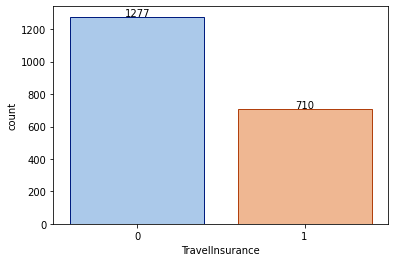

In [34]:
ax = sns.countplot(data=df,x="TravelInsurance",palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+0.5,'{:.0f}'.format(height), ha="center")

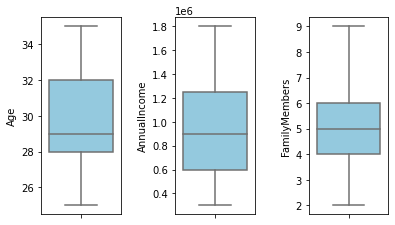

In [8]:
plt.figure(figsize=(20,12))
for i in range(1, len(nums)) :
  plt.subplot(4,11, i+2)
  sns.boxplot (y=df [nums[i]], color='skyblue', orient='v') 
plt.tight_layout ()

Imbalance percentage of Employment Type: 28.69%
Imbalance percentage of GraduateOrNot: 14.85%
Imbalance percentage of ChronicDiseases: 72.22%
Imbalance percentage of FrequentFlyer: 79.01%
Imbalance percentage of EverTravelledAbroad: 80.88%
Imbalance percentage of TravelInsurance: 64.27%


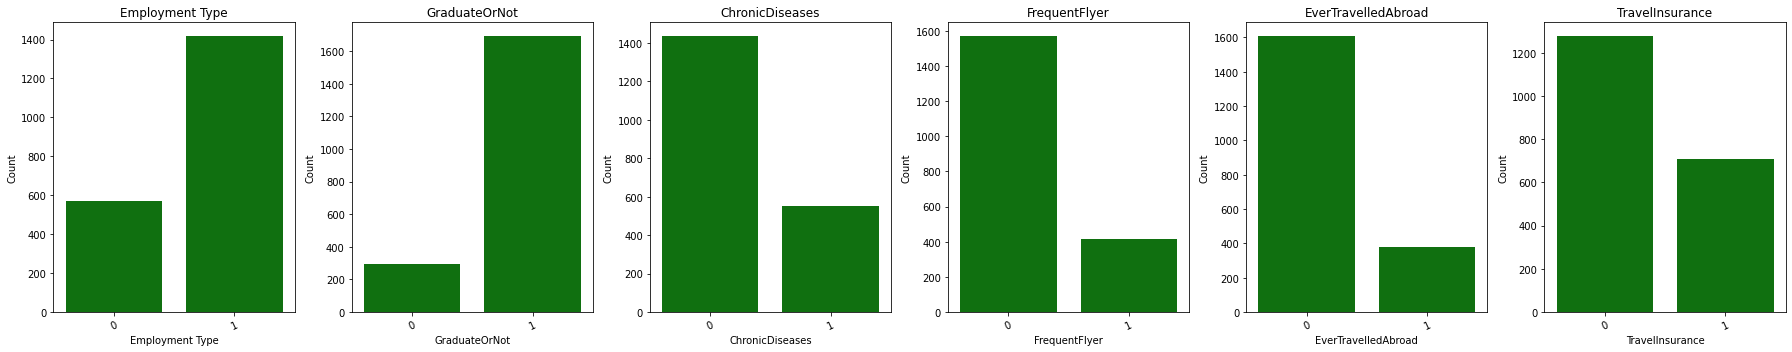

In [24]:
plt.figure(figsize=(25,5))
for i in range(0, len(cats)):
  plt.subplot(1,len(cats), i+1)
  sns.countplot(x=df[cats[i]], color='green')
  # Set y-label and rotate 90 degrees
  plt.ylabel('Count', rotation=90)
  # Set plot title
  plt.title(cats[i])
  # Rotate x-tick labels 90 degrees
  plt.xticks(rotation=25)
  # Adjust plot layout
  plt.tight_layout()

# Calculate imbalance for each feature
for feature in cats:
    value_counts = df[feature].value_counts()
    imbalance_percentage = (value_counts[0] / value_counts.sum()) * 100
    print(f"Imbalance percentage of {feature}: {imbalance_percentage:.2f}%")

Sự phân bố không đồng đều ở các biến categorical có thể làm cho mô hình không đạt được hiệu suất cao nhất

## Preprocessing

In [89]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df = df.drop("Unnamed: 0", axis=1)
    #df = df.drop_duplicates()
    return df

In [90]:
df = preprocessing_data(df)

In [91]:
df.shape

(1987, 9)

## Feature Engineering

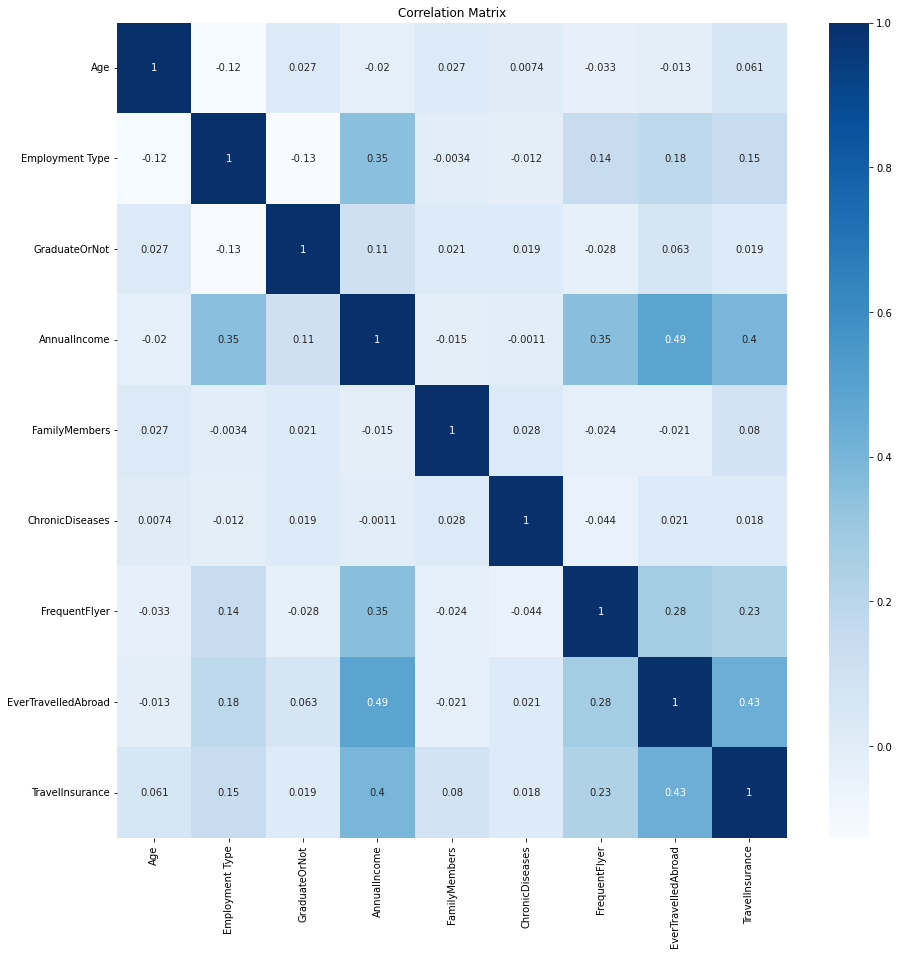

In [92]:
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(df):

    object_cols = df.select_dtypes(include=['object']).columns

    for col in object_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
    return df

df = apply_feature_engineering(df)
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int32
 2   GraduateOrNot        1987 non-null   int32
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int32
 6   FrequentFlyer        1987 non-null   int32
 7   EverTravelledAbroad  1987 non-null   int32
 8   TravelInsurance      1987 non-null   int32
dtypes: int32(6), int64(3)
memory usage: 93.3 KB


In [15]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [93]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(['TravelInsurance'], axis = 1)
    y = df['TravelInsurance']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [94]:
from imblearn.over_sampling import SMOTE

In [1]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 123
TRAIN_SIZE = 0.8

X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
print(trainX.shape)
print(trainY.shape)

NameError: name 'X' is not defined

## Build SK-learn model

In [96]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [97]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    precision_recall_f1score_train = precision_recall_fscore_support(trainY, y_train_pred, average='macro')
    precision_recall_f1score = precision_recall_fscore_support(testY, y_pred, average='macro')
    accuracy_train = accuracy_score(trainY, y_train_pred)
    accuracy = accuracy_score(testY, y_pred)

    scores = {"train_set": {"Accuracy" : accuracy_train,
                            "Precision" : precision_recall_f1score_train[0],
                            "Recall" : precision_recall_f1score_train[1],                          
                            "f1" : precision_recall_f1score_train[2]},
    
              "test_set": {"Accuracy" : accuracy,
                           "Precision" : precision_recall_f1score[0],
                           "Recall" : precision_recall_f1score[1],                          
                           "f1" : precision_recall_f1score[2]}}
    
    return pd.DataFrame(scores)

## Model 1 - GaussianNB

In [98]:
bn = GaussianNB()
bn.fit(trainX, trainY)
y_train_pred = bn.predict(trainX)
y_pred = bn.predict(testX)
value = train_val(trainY, y_train_pred, testY, y_pred)
value

,train_set,test_set
Accuracy,0.743864,0.793970
Precision,0.732741,0.777011
Recall,0.692384,0.737570
f1,0.701272,0.750581


In [116]:
def build_model_l1(X, y):
    model = GaussianNB()
    scaler = MinMaxScaler()
    pca = PCA(0.95)
    operation = [("scaler", scaler),("pca", pca),("gauss", model)]
    model = Pipeline(steps=operation)
    param_grid = {
    "scaler__feature_range": [(0, 1)],
    "pca__n_components": [6, 7, 8],
    "gauss__var_smoothing": np.logspace(-4, -9, num=100)
    }
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)
    grid_search = GridSearchCV(model, param_grid, n_jobs=2, cv = 8,return_train_score=True)
    grid_search.fit(X, y)
    
    return grid_search

In [117]:
model = build_model_l1(trainX, trainY)
model

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('gauss', GaussianNB())]),
             n_jobs=2,
             param_grid={'gauss__var_smoothing': array([1.00000000e-04, 8.90215085e-05, 7.92482898e-05, 7.05480231e-05,
       6.28029144e-05, 5.59081018e-05, 4.97702356e-05, 4.43062146e-05,
       3.94420606e-05, 3.51119173e-05, 3.12571585e-05, 2.782559...
       9.11162756e-09, 8.11130831e-09, 7.22080902e-09, 6.42807312e-09,
       5.72236766e-09, 5.09413801e-09, 4.53487851e-09, 4.03701726e-09,
       3.59381366e-09, 3.19926714e-09, 2.84803587e-09, 2.53536449e-09,
       2.25701972e-09, 2.00923300e-09, 1.78864953e-09, 1.59228279e-09,
       1.41747416e-09, 1.26185688e-09, 1.12332403e-09, 1.00000000e-09]),
                         'pca__n_components': [6, 7, 8],
                         'scaler__feature_range': [(0, 1)]},
             return_train_score=True)

In [119]:
model.best_params_

{'gauss__var_smoothing': 0.0001,
 'pca__n_components': 8,
 'scaler__feature_range': (0, 1)}

In [120]:
model.best_score_

0.752077940206081

In [121]:
y_train_pred = model.predict(trainX)
y_pred = model.predict(testX)
value = train_val(trainY, y_train_pred, testY, y_pred)
value

,train_set,test_set
Accuracy,0.760227,0.806533
Precision,0.758510,0.794396
Recall,0.705993,0.750822
f1,0.716839,0.765192


<AxesSubplot: >

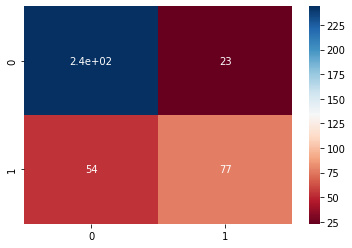

In [122]:
conf_mat = confusion_matrix(testY, y_pred)
sns.heatmap(conf_mat, annot = True, cmap = 'RdBu')

In [129]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7.\n Other conclusion: Ở bài toán phân loại này em chọn recall là main metric. Mô hình dựa trên GaussianNB thông qua pipeline\n với MinMaxScaler range = [0, 1], bên cạnh đó em còn sử dụng PCA để tiến hành giảm chiều dữ liệu cho mô hình. Trước đó em đã thử qua nhiều mô hình phía trước nhưng đây là mô hình tốt nhất em khám phá ra."

In [130]:
print(get_conclusion())

7.
 Other conclusion: Ở bài toán phân loại này em chọn recall là main metric. Mô hình dựa trên GaussianNB thông qua pipeline
 với MinMaxScaler range = [0, 1], bên cạnh đó em còn sử dụng PCA để tiến hành giảm chiều dữ liệu cho mô hình. Trước đó em đã thử qua nhiều mô hình phía trước nhưng đây là mô hình tốt nhất em khám phá ra.
